# **DISCREATE FOURIER TRANSFORM (DFT)**

================= HASIL DFT =================

Sinyal Awal:
[8, 4, 8, 0]


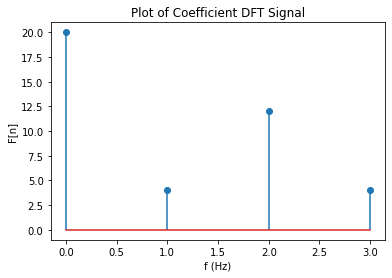

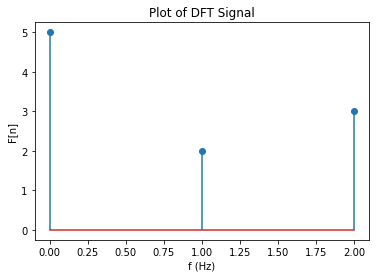

Hasil Perkalian Dot:
[(20+0j), (-4.1389114358025836e-13-3.9999999999983453j), (12-2.4818772853225734e-12j), (1.241673430740775e-12+4.000000000004964j)]

Koefisien DFT:
[20.0, 3.9999999999983453, 12.0, 4.000000000004964]

Hasil Akhir DFT:
[5.0, 2.0000000000008273, 3.0]

Duration: 0:00:00.314071

================= HASIL DFT =================

Sinyal Awal:
[1, 0, -1, 0]


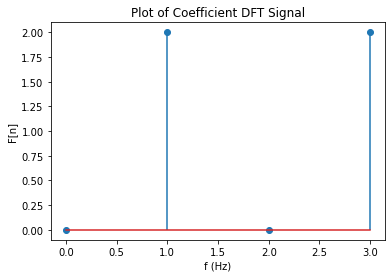

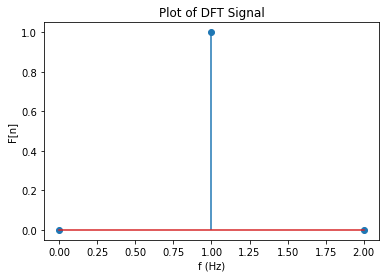

Hasil Perkalian Dot:
[0j, (2-2.0682310711021444e-13j), 4.136462142204289e-13j, (2-6.204693213306434e-13j)]

Koefisien DFT:
[0.0, 2.0, 4.136462142204289e-13, 2.0]

Hasil Akhir DFT:
[0.0, 1.0, 1.0341155355510722e-13]

Duration: 0:00:00.295037

================= HASIL DFT =================

Sinyal Awal:
[1, 1, 1, 1, 1, 1]


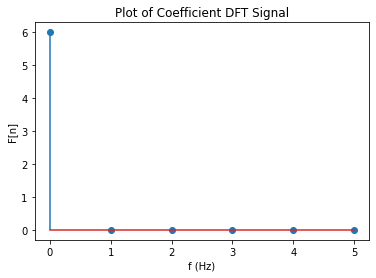

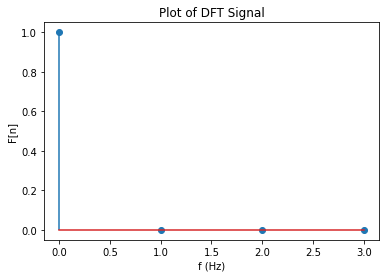

Hasil Perkalian Dot:
[(6+0j), (3.5837999234900053e-13+2.070565940925917e-13j), (2.389199948993337e-13+4.1378012127779584e-13j), 6.208367153703875e-13j, (-4.779510121011299e-13+8.275602425555917e-13j), (-1.7917889394425401e-12+1.0347278589506459e-12j)]

Koefisien DFT:
[6.0, 4.138944938910084e-13, 4.778040945066975e-13, 6.208367153703875e-13, 9.556637091713613e-13, 2.069098679521402e-12]

Hasil Akhir DFT:
[1.0, 2.2825970051039493e-13, 4.244837956713499e-13, 1.0347278589506459e-13]

Duration: 0:00:00.294417

================= HASIL DFT =================

Sinyal Awal:
[5, 0, 2, 4, 2, 0, 1, 0, 5, 5]

Sinyal Setelah Normalisasi:
[0.5, 0.0, 0.2, 0.4, 0.2, 0.0, 0.1, 0.0, 0.5, 0.5]


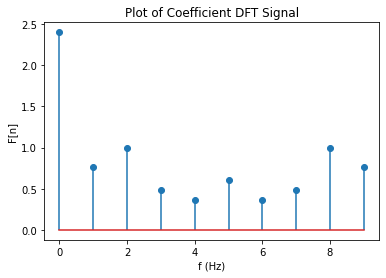

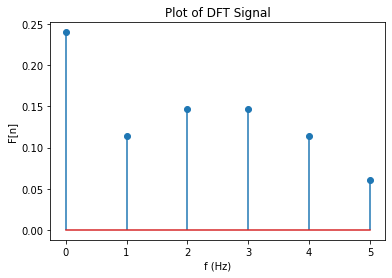

Hasil Perkalian Dot:
[(2.4000000000000004+0j), (0.7545084971876722+0.14000844928732947j), (-0.14270509831188205+0.9820835863820467j), (0.19549150281285832+0.43920113174774794j), (0.19270509831218663-0.3130684100306209j), (0.5999999999999999-2.0594637106796654e-14j), (0.19270509831293103+0.31306841003187713j), (0.19549150281175226-0.4392011317462834j), (-0.14270509831489256-0.9820835863809281j), (0.7545084971856857-0.14000844928877282j)]

Koefisien DFT:
[2.4000000000000004, 0.7673887138864125, 0.9923975593103941, 0.4807437589824047, 0.36762356327445944, 0.5999999999999999, 0.36762356327591944, 0.48074375898061694, 0.9923975593097198, 0.7673887138847226]

Hasil Akhir DFT:
[0.24000000000000005, 0.1135012277162332, 0.14731413182910108, 0.14731413182921244, 0.1135012277159182, 0.059999999999999984]

Duration: 0:00:00.251730


In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from datetime import datetime
import numpy as np
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)

# fungsi untuk menghitung magnitude dari complex number
def Mag(A, B):
    return pow((pow(A, 2) + pow(B, 2)), 0.5)

# fungsi untuk menghitung DFT
def DFT(x):

    #pendefinisian variabel yang digunakan
    N = len(x)
    e = 2.718281828459045
    pi = 3.14159265359
    w = 2*pi/N
    W = e**(-1j*w)
    arr = []
    sum = 0
    dot = []
    coef_mag = []
    panjang = []
    panjang2 = []
    hasil_dft = []

    # for loop untuk mendapatkan matrix W, 
    # kemudian dikalikan sehingga menghasilkan dot product
    # serta dicari nilai magnitude untuk complex number yang didapatkan
    for i in range(N):
        col = []
        for j in range(N):
            temp = pow(W, i*j)
            sum = sum + temp * x[j]
            col.append(temp)
        panjang.append(i)
        arr.append(col)
        dot.append(sum)
        temp = Mag(dot[i].real, dot[i].imag)
        coef_mag.append(temp)
        sum = 0
    
    # for loop untuk melakukan mirroring hasil coefficient DFT yang didapatkan, 
    # serta dikali 1/N untuk menghasilkan sinyal DFT akhir 
    N2 = int(N/2)
    for i in range(N2):
        panjang2.append(i)
        if i == 0:
            hasil_dft.append(coef_mag[0]/N)
            continue
        temp = coef_mag[i] + coef_mag[N2+i]
        hasil_dft.append(temp/N)
        if i == N2 - 1:
            hasil_dft.append(coef_mag[N2]/N)
            panjang2.append(i+1)
    
    # melakukan plot untuk sinyal coefficient DFT
    plt.xlabel('f (Hz)')
    plt.ylabel('F[n]')
    plt.title("Plot of Coefficient DFT Signal")
    plt.stem(panjang, coef_mag)
    plt.show()
    
    # melakukan plot untuk sinyal akhir DFT
    plt.xlabel('f (Hz)')
    plt.ylabel('F[n]')
    plt.title("Plot of DFT Signal")
    plt.stem(panjang2, hasil_dft)
    plt.show()

    # menampilkan keseluruhan hasil perhitungan
    print("Hasil Perkalian Dot:")
    print(dot)
    print("\nKoefisien DFT:")
    print(coef_mag)
    print("\nHasil Akhir DFT:")
    print(hasil_dft)

# perhitungan untuk sinyal awal [8, 4, 8, 0]
print("================= HASIL DFT =================\n")
print("Sinyal Awal:")
x1 = [8, 4, 8, 0]
print(x1)

start_time = datetime.now() 
DFT(x1)
end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time)) #menghitung waktu

# perhitungan untuk sinyal awal [1, 0, -1, 0]
print("\n================= HASIL DFT =================\n")
print("Sinyal Awal:")
x2 = [1, 0, -1, 0]
print(x2)
start_time = datetime.now() 
DFT(x2)
end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time)) #menghitung waktu

# perhitungan untuk sinyal awal [1, 1, 1, 1, 1, 1]
print("\n================= HASIL DFT =================\n")
print("Sinyal Awal:")
x3 = [1, 1, 1, 1, 1, 1]
print(x3)
start_time = datetime.now() 
DFT(x3)
end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time)) #menghitung waktu

# perhitungan untuk sinyal awal [5, 0, 2, 4, 2, 0, 1, 0, 5, 5] yang akan dinormalisasi terlebih dahulu
print("\n================= HASIL DFT =================\n")
print("Sinyal Awal:")
x4 = [5, 0, 2, 4, 2, 0, 1, 0, 5, 5]
print(x4)
normal = normalize([x4])
normal_arr = []

# memasukkan hasil normalisasi pada array baru
for i in range(len(normal)):
    for j in range(len(x4)):
        normal_arr.append(normal[i][j])
print("\nSinyal Setelah Normalisasi:")
print(normal_arr)

start_time = datetime.now() 
DFT(normal_arr)
end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time)) #menghitung waktu


# **INVERSE DISCREATE FOURIER TRANSFORM (IDFT)**

================= HASIL IDFT =================

Sinyal Awal DFT:
[(20+0j), (-4.1389114358025836e-13-3.9999999999983453j), (12-2.4818772853225734e-12j), (1.241673430740775e-12+4.000000000004964j)]


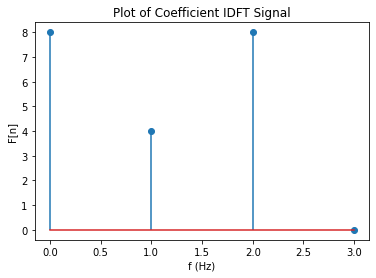

Hasil Perkalian Dot:
[(8.000000000000208+1.0342837697407958e-12j), (4.000000000000827-2.4492935948721826e-16j), (8.000000000000208-1.0342837697407958e-12j), (-8.271161533457416e-13-2.0679861417433414e-12j)]

Duration: 0:00:00.132082

================= HASIL IDFT =================

Sinyal Awal DFT:
[0j, (2-2.0682310711021444e-13j), 4.136462142204289e-13j, (2-6.204693213306434e-13j)]


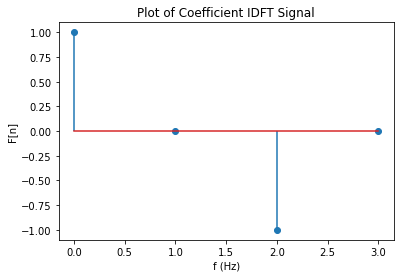

Hasil Perkalian Dot:
[(1-1.0341155355510723e-13j), (2.1387898817361617e-26-1.0341727474383333e-13j), (-1-1.0341155355510723e-13j), (-2.0682310711015022e-13-1.0336176359260207e-13j)]

Duration: 0:00:00.187324

================= HASIL IDFT =================

Sinyal Awal DFT:
[(6+0j), (3.5837999234900053e-13+2.070565940925917e-13j), (2.389199948993337e-13+4.1378012127779584e-13j), 6.208367153703875e-13j, (-4.779510121011299e-13+8.275602425555917e-13j), (-1.7917889394425401e-12+1.0347278589506459e-12j)]


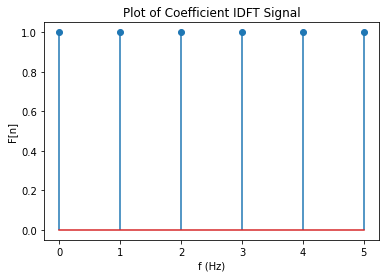

Hasil Perkalian Dot:
[(0.9999999999997214+5.173269220411688e-13j), (1.0000000000000797+3.103857916488655e-13j), (1.0000000000001992+1.0342445349894241e-13j), (1.0000000000001992-1.0354680076312574e-13j), (1.0000000000000797-3.103330178546209e-13j), (0.9999999999997212-5.172573485712301e-13j)]

Duration: 0:00:00.125002

================= HASIL IDFT =================

Sinyal Awal DFT:
[(2.4000000000000004+0j), (0.7545084971876722+0.14000844928732947j), (-0.14270509831188205+0.9820835863820467j), (0.19549150281285832+0.43920113174774794j), (0.19270509831218663-0.3130684100306209j), (0.5999999999999999-2.0594637106796654e-14j), (0.19270509831293103+0.31306841003187713j), (0.19549150281175226-0.4392011317462834j), (-0.14270509831489256-0.9820835863809281j), (0.7545084971856857-0.14000844928877282j)]


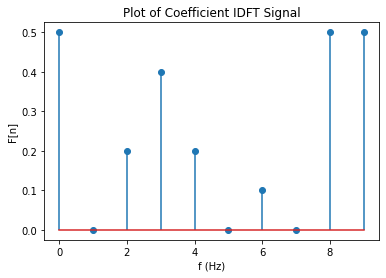

Hasil Perkalian Dot:
[(0.49999999999963124+2.375377672336754e-13j), (-8.983924715266767e-14+1.8794965583879276e-13j), (0.19999999999999543+1.383337888682945e-13j), (0.40000000000003233+8.874012635828876e-14j), (0.20000000000006937+3.9312997301976796e-14j), (8.690825836765725e-14-1.0322298571452392e-14j), (0.10000000000006568-5.99409410995122e-14j), (3.4017233474514794e-14-1.0969003483296547e-13j), (0.4999999999999208-1.5918377727075494e-13j), (0.49999999999971284-2.084332706431269e-13j)]

Duration: 0:00:00.104832


In [2]:
def IDFT(x):

    #pendefinisian variabel yang digunakan
    N = len(x)
    e = 2.718281828459045
    pi = 3.14159265359
    w = 2*pi/N
    Wn = e**(1j*w)
    arr = []
    sum = 0
    dot = []
    coef_mag = []
    panjang = []

    # for loop untuk mendapatkan matrix W, 
    # kemudian dikalikan sehingga menghasilkan dot product
    # serta dicari nilai magnitude untuk complex number yang didapatkan
    for i in range(N):
        col = []
        for j in range(N):
            temp = pow(Wn, i*j)
            sum = sum + temp * x[j]
            col.append(temp)
        panjang.append(i)
        arr.append(col)
        dot.append(sum / N)
        temp = Mag(dot[i].real, dot[i].imag)
        coef_mag.append(temp)
        sum = 0
    
    # melakukan plot untuk sinyal awal IDFT
    plt.xlabel('f (Hz)')
    plt.ylabel('F[n]')
    plt.title("Plot of Coefficient IDFT Signal")
    plt.stem(panjang, dot);
    plt.show()

    # menampilkan keseluruhan hasil perhitungan
    print("Hasil Perkalian Dot:")
    print(dot);

print("================= HASIL IDFT =================\n")
print("Sinyal Awal DFT:")
x5 = [(20+0j), (-4.1389114358025836e-13-3.9999999999983453j), (12-2.4818772853225734e-12j), (1.241673430740775e-12+4.000000000004964j)]
print(x5)
start_time = datetime.now() 
IDFT(x5)
end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time)) #menghitung waktu

print("\n================= HASIL IDFT =================\n")
print("Sinyal Awal DFT:")
x6 = [0j, (2-2.0682310711021444e-13j), 4.136462142204289e-13j, (2-6.204693213306434e-13j)]
print(x6)
start_time = datetime.now() 
IDFT(x6)
end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time)) #menghitung waktu

print("\n================= HASIL IDFT =================\n")
print("Sinyal Awal DFT:")
x7 = [(6+0j), (3.5837999234900053e-13+2.070565940925917e-13j), (2.389199948993337e-13+4.1378012127779584e-13j), 6.208367153703875e-13j, (-4.779510121011299e-13+8.275602425555917e-13j), (-1.7917889394425401e-12+1.0347278589506459e-12j)]
print(x7)
start_time = datetime.now() 
IDFT(x7)
end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time)) #menghitung waktu

print("\n================= HASIL IDFT =================\n")
print("Sinyal Awal DFT:")
x8 = [(2.4000000000000004+0j), (0.7545084971876722+0.14000844928732947j), (-0.14270509831188205+0.9820835863820467j), (0.19549150281285832+0.43920113174774794j), (0.19270509831218663-0.3130684100306209j), (0.5999999999999999-2.0594637106796654e-14j), (0.19270509831293103+0.31306841003187713j), (0.19549150281175226-0.4392011317462834j), (-0.14270509831489256-0.9820835863809281j), (0.7545084971856857-0.14000844928877282j)]
print(x8)
start_time = datetime.now() 
IDFT(x8)
end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time)) #menghitung waktu